## Página 727 . Burden Faires 9na edición

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
L = 1
T = 0.5  #tiempo max
dx = h = 0.1
dt = k = 0.0005
alfa = 1

In [3]:
r = round(alfa*k/h**2,4); r

0.05

In [4]:
# valores frontera
m = round(L/dx) + 1
n = round(T/dt) + 1
print(m,n)

11 1001


In [5]:
x = np.linspace(0,L,m); x

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [6]:
%%time
sol = np.zeros((n,m))  #matriz con las soluciones aproximadas
w = np.zeros(m)  #reserva para el valor inicial
for i in range(m):
    w[i] = round(np.sin(np.pi*x[i]),8)
sol[0] = w.copy()
sol[0]

CPU times: user 1 ms, sys: 0 ns, total: 1 ms
Wall time: 207 µs


In [7]:
%%time
for j in range(n-1):
    u = sol[j].copy()
    w = u.copy()
    for i in range(1,m-1):
        u[i] = r*w[i-1] + (1-2*r)*w[i] + r*w[i+1]
    sol[j+1] = u.copy()
u

CPU times: user 11 ms, sys: 2 ms, total: 13 ms
Wall time: 15.7 ms


CPU times: user 37 ms, sys: 0 ns, total: 37 ms
Wall time: 42.4 ms


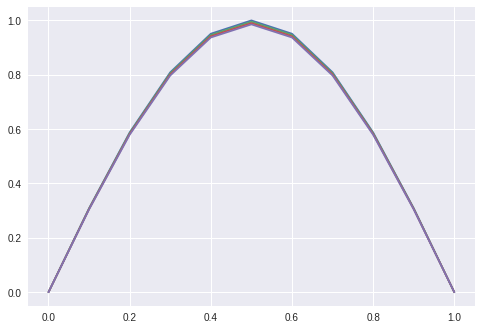

In [8]:
%%time
plt.plot(x,sol[0])
plt.plot(x,sol[1])
plt.plot(x,sol[2])
plt.plot(x,sol[3])

In [0]:
from matplotlib.animation import FuncAnimation

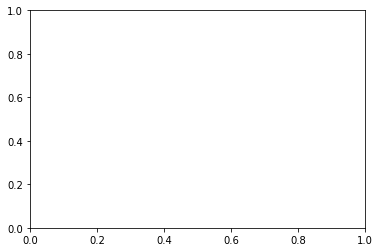

In [0]:
fig, ax = plt.subplots()
def animate(i):
    #ax.cla()
    ax.plot(x,sol[i])

In [0]:
anim = FuncAnimation(fig,animate,n,interval=1,repeat=True)

In [0]:
from IPython.display import HTML

In [0]:
%%time
HTML(anim.to_html5_video())

Wall time: 2min 34s


### Método Alternativo, usando matrices

In [10]:
def tridiag(a,b,c,N):
    A = np.zeros([N,N])
    np.fill_diagonal(A[1:,:-1],a)
    np.fill_diagonal(A[:-1,1:],c)
    np.fill_diagonal(A,b)
    return A

A = tridiag(r,1-2*r,r,m-2)
A

array([[0.9 , 0.05, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.05, 0.9 , 0.05, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.05, 0.9 , 0.05, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.05, 0.9 , 0.05, 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.05, 0.9 , 0.05, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.05, 0.9 , 0.05, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.05, 0.9 , 0.05, 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.05, 0.9 , 0.05],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.05, 0.9 ]])

In [11]:
sol[0]

array([0.        , 0.30901699, 0.58778525, 0.80901699, 0.95105652,
       1.        , 0.95105652, 0.80901699, 0.58778525, 0.30901699,
       0.        ])

Una forma es multiplicar $A \cdot w^{j-1} $ para obtener $w^{j}$

In [12]:
np.dot(A,sol[0][1:-1])

array([0.30750455, 0.58490842, 0.80505738, 0.94640172, 0.99510565,
       0.94640172, 0.80505738, 0.58490842, 0.30750455])

In [0]:
np.linalg.matrix_power(A,1000)

array([[0.00014132, 0.0002688 , 0.00036997, 0.00043492, 0.0004573 ,
        0.00043492, 0.00036997, 0.0002688 , 0.00014131],
       [0.0002688 , 0.00051128, 0.00070372, 0.00082727, 0.00086984,
        0.00082727, 0.00070372, 0.00051128, 0.0002688 ],
       [0.00036997, 0.00070372, 0.00096859, 0.00113864, 0.00119724,
        0.00113864, 0.00096858, 0.00070372, 0.00036997],
       [0.00043492, 0.00082727, 0.00113864, 0.00133855, 0.00140744,
        0.00133855, 0.00113864, 0.00082727, 0.00043492],
       [0.0004573 , 0.00086984, 0.00119724, 0.00140744, 0.00147987,
        0.00140744, 0.00119724, 0.00086984, 0.0004573 ],
       [0.00043492, 0.00082727, 0.00113864, 0.00133855, 0.00140744,
        0.00133855, 0.00113864, 0.00082727, 0.00043492],
       [0.00036997, 0.00070372, 0.00096858, 0.00113864, 0.00119724,
        0.00113864, 0.00096859, 0.00070372, 0.00036997],
       [0.0002688 , 0.00051128, 0.00070372, 0.00082727, 0.00086984,
        0.00082727, 0.00070372, 0.00051128, 0.0002688 ],


In [0]:
print( np.array_str(np.linalg.matrix_power(A,1000), precision=4, suppress_small=True))

[[0.0001 0.0003 0.0004 0.0004 0.0005 0.0004 0.0004 0.0003 0.0001]
 [0.0003 0.0005 0.0007 0.0008 0.0009 0.0008 0.0007 0.0005 0.0003]
 [0.0004 0.0007 0.001  0.0011 0.0012 0.0011 0.001  0.0007 0.0004]
 [0.0004 0.0008 0.0011 0.0013 0.0014 0.0013 0.0011 0.0008 0.0004]
 [0.0005 0.0009 0.0012 0.0014 0.0015 0.0014 0.0012 0.0009 0.0005]
 [0.0004 0.0008 0.0011 0.0013 0.0014 0.0013 0.0011 0.0008 0.0004]
 [0.0004 0.0007 0.001  0.0011 0.0012 0.0011 0.001  0.0007 0.0004]
 [0.0003 0.0005 0.0007 0.0008 0.0009 0.0008 0.0007 0.0005 0.0003]
 [0.0001 0.0003 0.0004 0.0004 0.0005 0.0004 0.0004 0.0003 0.0001]]


### Test $A^n w^0 = w^n$
Otra forma es operar solo los puntos interiores

In [13]:
%%time
np.dot(np.linalg.matrix_power(A,1000) ,sol[0][1:-1])

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 1.09 ms


array([0.00228652, 0.00434922, 0.00598619, 0.00703719, 0.00739934,
       0.00703719, 0.00598619, 0.00434922, 0.00228652])

In [14]:
sol[n-1]

array([0.        , 0.00228652, 0.00434922, 0.00598619, 0.00703719,
       0.00739934, 0.00703719, 0.00598619, 0.00434922, 0.00228652,
       0.        ])

In [1]:
data = {"i":x,"sol. aprox": np.round(temp, 6), "sol analitica": u}

NameError: ignored

In [0]:
import pandas as pd

In [20]:
data = {"i":x,"sol. aprox": np.round(temp, 6), "sol analitica": u}
data

{'i': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 'sol': array([0.      , 0.002287, 0.004349, 0.005986, 0.007037, 0.007399,
        0.007037, 0.005986, 0.004349, 0.002287, 0.      ])}

In [0]:
tabla = pd.DataFrame(data)

In [22]:
tabla

,i,sol
0,0.0,0.000000
1,0.1,0.002287
2,0.2,0.004349
3,0.3,0.005986
4,0.4,0.007037
5,0.5,0.007399
6,0.6,0.007037
7,0.7,0.005986
8,0.8,0.004349
9,0.9,0.002287
